## Group 25 
### Olof Sjögren, ??
### Romain Theodet, ??

# Question 1: Preprocessing

In [2]:
from tensorflow import keras 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == "channels_first":
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# From the documentation we get the structure of the result from `load_data()`: \
# `x_train`: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255. \
# `y_train`: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data. \
# `x_test`: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255. \
# `y_test`: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

# If the data format is "channel_first", it means that the data has a size 1x28x28: 
# number of channels (3 for RGB, 1 for grayscale here), number of rows, number of columns.
# Otherwise, the data has a size 28x28x1: number of rows, number of columns, number of channels.

# We need to reshape the data as currently the "last" dimension contains all the pixel data next to each other. This is done in the if-else statement.
# If the image was in RGB, the input dataset shape would be (60000, 28, 28*3) = (60000, 28, 84),
# which is definitely not what we want. Instead, we would like (60000, 28, 28, 3), again for RGB only.


### Preprocessing ###


# We want to "resize" the pixels value from [0..255] to [0..1]
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


### Define model ###


model = Sequential()

# 4 layers:
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(num_classes, activation="softmax"))

model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.SGD(lr = 0.1),
               metrics=["accuracy"])

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss: {}, Test accuracy {}".format(score[0], score[1]))


11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 0.7777 - accuracy: 0.7747 - val_loss: 0.2459 - val_accuracy: 0.9277
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2481 - accuracy: 0.9287 - val_loss: 0.2058 - val_accuracy: 0.9385
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1861 - accuracy: 0.9464 - val_loss: 0.1530 - val_accuracy: 0.9544
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1495 - accuracy: 0.9575 - val_loss: 0.1394 - val_accuracy: 0.9558
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1274 - accuracy: 0.9622 - val_loss: 0.1393 - val_accuracy: 0.9549
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1082 - accuracy: 0.9680 - val_loss: 0.1119 - val_accuracy: 0.9658
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0923 - 

## Q1

Once we get the data on a correct format, we need to cast the values to floats and divide by 255 to resize the pixel values from `[0 .. 255]` to `[0 .. 1]`, getting our grayscale values.
Finally we convert the vector of integers the pictures denote to a matrix of binary vectors, with a one at the index corresponding to the number the picture represents and 0 elsewhere in each vector.

## Q2.A


*  How many layers does the network in the notebook have? How many neurons does each layer have? What activation functions and why are these appropriate for this application? 

    * The model has 4 layers:
        - `Flatten`, which will output a 1 dimensional matrix, and counts for 28\*28 = 784 neuron. *(Input layer)*
            - This layer is appropriate as it simplify the next layers, since they can work on a 1-dimensional vector.
        - `Dense` with a ReLU activation function and 64 neurons.
            - ReLU is used instead of the sigmoid or tanh because it is fast and efficient, optimizing the gradient descent.
        - `Dense` with a ReLU activation function and 64 neurons, again.
            - Same reasons as above.
        - `Dense` again with a Softmax activation and 10 neurons, one for each output from 0 to 9. *(Output layer)*
            - Softmax function is appropriate since it will normalize the output, resulting in different probabilities for each output.

*  What is the total number of parameters for the network? 
    * The parameters of the network are the weights and biases.
        The first layer has `28*28=784` neurons and each of these have a connection to each neuron in the next layer
        resulting in 784\*64 weights. Each neuron in the next layer is also connected to each neuron in the layer after that,
        this is true for each of the layers except the last layer which isn't connected to anything.
        Also, each neuron has a bias which is a parameter. So, the total number of parameters for the nerual network is: \
        `(784*64 + 64*64 + 64*10) + (64 + 64 + 10) = 55 050` parameters

*  Why does the input and output layers have the dimensions they have? 
    * The input layer has 784 neurons, one for each pixel of the 28\*28\*1 matrix since its role is to flatten our multi-dimensional matrix,
        and the output layer has a dimension of 10 as it needs to classify the images with 10 labels,
        the numbers between 0 and 9.  


## Q2.B
* What loss-function is used to train the network? 
    * The loss function used is categorical crossentropy, which is an optimization function used in case of training a classification model.
        This function classifies the data by predicting the probability of whether the data belongs to one class or the other class.

* What is the functional form (mathematical expression) of the loss function? and how should we interpret it? 
    * The mathematical expression is the following one: \
           $ loss = - \sum_{i=1}^{10} y_i \cdot log(\hat{y}_i) $ \
        where  $y_i$  is the probability of the *i:th* result and $\hat{y}_i$ is the *i:th* value in the binary vector indicating the correct result. \
        $\hat{y}_i$  will only be 1 for one index in the $\hat{y}$ vector, and 0 for every other number. Thus the loss will only be affected by the prediction corresponding to the actual number it represents as all other predictions will be multiplied by 0. This is the only loss which matters and should be minimized. By using log, accurate predicitions result in a lower loss and vice versa.

* Why is it appropriate for the problem at hand? 
    * The categorical cross-entropy is used here because it is a multi-class classification model. There is only one correct option (represented by a 1 in the vector) and all other options are incorrect (represented by a 0). The options are the different numbers the image represents. It also pairs well with Softmax as it guarantees positive values which is required for the log-function.


## Q2.C

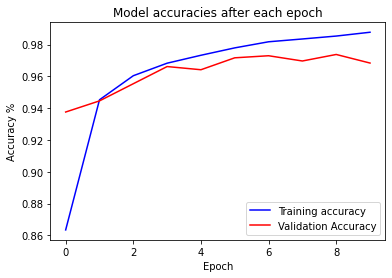

In [3]:
import matplotlib.pyplot as plt

# Plotting the model accuracies after each epoch
plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.title("Model accuracies after each epoch")
plt.plot(fit_info.epoch, fit_info.history["accuracy"], color="blue", label="Training accuracy")
plt.plot(fit_info.epoch, fit_info.history["val_accuracy"], color="red", label="Validation Accuracy")
plt.legend()
plt.show()


## Q2.D

In [4]:
## Define model ##
model = Sequential()

epochs = 40

# Layers:
model.add(Flatten())
model.add(Dense(500, activation = "relu"))
model.add(Dense(300, activation = "relu"))
model.add(Dense(num_classes, activation="softmax"))

model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.SGD(lr = 0.1),
               metrics=["accuracy"])

fit_info_q2d = model.fit(x_train, y_train,
               batch_size=batch_size,
               epochs=epochs,
               verbose=1,
               validation_data=(x_test, y_test))
               
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss: {}, Test accuracy {}".format(score[0], score[1]))


Epoch 1/40
469/469 [==============================] - 9s 19ms/step - loss: 0.6919 - accuracy: 0.8170 - val_loss: 0.2161 - val_accuracy: 0.9372
Epoch 2/40
469/469 [==============================] - 9s 19ms/step - loss: 0.2026 - accuracy: 0.9410 - val_loss: 0.1554 - val_accuracy: 0.9523
Epoch 3/40
469/469 [==============================] - 9s 18ms/step - loss: 0.1447 - accuracy: 0.9594 - val_loss: 0.1205 - val_accuracy: 0.9641
Epoch 4/40
469/469 [==============================] - 9s 18ms/step - loss: 0.1112 - accuracy: 0.9682 - val_loss: 0.1215 - val_accuracy: 0.9640
Epoch 5/40
469/469 [==============================] - 8s 18ms/step - loss: 0.0920 - accuracy: 0.9732 - val_loss: 0.0949 - val_accuracy: 0.9704
Epoch 6/40
469/469 [==============================] - 9s 18ms/step - loss: 0.0741 - accuracy: 0.9796 - val_loss: 0.0908 - val_accuracy: 0.9722
Epoch 7/40
469/469 [==============================] - 9s 18ms/step - loss: 0.0622 - accuracy: 0.9824 - val_loss: 0.0790 - val_accuracy: 0.9769

Now we plot the accuracies during the different epochs.

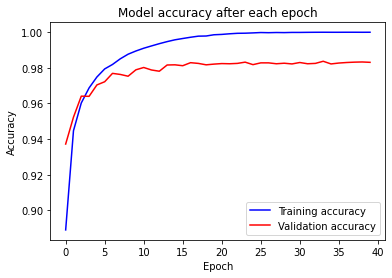

In [5]:
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model accuracy after each epoch")
plt.plot(fit_info_q2d.epoch, fit_info_q2d.history["accuracy"], color="blue", label="Training accuracy")
plt.plot(fit_info_q2d.epoch, fit_info_q2d.history["val_accuracy"], color="red", label="Validation accuracy")
plt.legend()
plt.show()


The best accuracy we got is 0.9821. We can clearly see the training accuracy increasing with some decline towards the end. Although, it does so without increasing validation accuracy after some epochs.

In [6]:
from tensorflow.keras import regularizers

# Used to store the results
results_q2d = []

# For each regularization factor (we arbitrarily picked (1e-6, 1e-5, 1e-4, 1e-3))
for factor in (1e-6, 1e-5, 1e-4, 1e-3):

    # Training 3 replicates networks
    for i in range(3):
        ## Define model ##
        model = Sequential()

        # Layers:
        model.add(Flatten())
        model.add(Dense(500, activation = "relu", kernel_regularizer=regularizers.l2(l2=factor)))
        model.add(Dense(300, activation = "relu", kernel_regularizer=regularizers.l2(l2=factor)))
        model.add(Dense(num_classes, activation="softmax"))

        model.compile(loss=keras.losses.categorical_crossentropy,
                    optimizer=keras.optimizers.SGD(lr = 0.1),
                    metrics=["accuracy"])

        fit_info_tmp = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

        # Evaluate
        score = model.evaluate(x_test, y_test, verbose=0)

        # Save the results
        results_q2d.append([factor, i, fit_info_tmp, score])


Epoch 1/15
469/469 [==============================] - 10s 20ms/step - loss: 0.6975 - accuracy: 0.8165 - val_loss: 0.2197 - val_accuracy: 0.9388
Epoch 2/15
469/469 [==============================] - 9s 20ms/step - loss: 0.2054 - accuracy: 0.9405 - val_loss: 0.1605 - val_accuracy: 0.9526
Epoch 3/15
469/469 [==============================] - 9s 20ms/step - loss: 0.1475 - accuracy: 0.9582 - val_loss: 0.1285 - val_accuracy: 0.9641
Epoch 4/15
469/469 [==============================] - 9s 20ms/step - loss: 0.1155 - accuracy: 0.9672 - val_loss: 0.1054 - val_accuracy: 0.9701
Epoch 5/15
469/469 [==============================] - 9s 20ms/step - loss: 0.0929 - accuracy: 0.9735 - val_loss: 0.1074 - val_accuracy: 0.9670
Epoch 6/15
469/469 [==============================] - 9s 20ms/step - loss: 0.0770 - accuracy: 0.9778 - val_loss: 0.0855 - val_accuracy: 0.9736
Epoch 7/15
469/469 [==============================] - 9s 19ms/step - loss: 0.0638 - accuracy: 0.9822 - val_loss: 0.0769 - val_accuracy: 0.976

KeyboardInterrupt: 

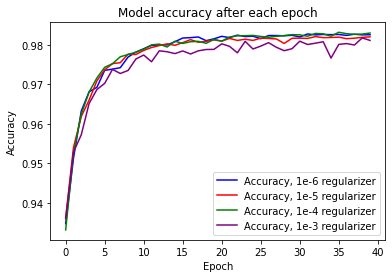

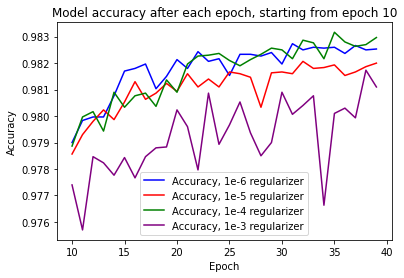

Final score with 1e-6 regularizer: 0.982533315817515
Final score with 1e-5 regularizer: 0.9819999933242798
Final score with 1e-4 regularizer: 0.9829666614532471
Final score with 1e-3 regularizer: 0.9811000029246012


In [25]:
import math

epochs = results_q2d[0][2].epoch

# Data in a more convenient format, where the replicas are merged
data = []
scores = []

# We are saving our data in a single dimension array,
# so to access the 2nd results of the 1e-4 accuracy
# we need to get the index 2*3 + 1,
# where the 2 refer to 1e-4 and the 1 the 2nd result

for i in range(4):
    # We will merge all the data for each accuracy to get a mean
    dataset = [0 for i in range(len(epochs))]
    score = 0

    for j in range(3):
        # Merging the score of each replica
        score += results_q2d[i * 3 + j][3][1]

        for k in range(len(epochs)):
            # Merging the values
            dataset[k] += results_q2d[i * 3 + j][2].history["val_accuracy"][k]

    for k in range(len(epochs)):
        dataset[k] /= 3.

    scores.append(score / 3.)
    data.append(dataset)

# Plotting the results using the different regularizers
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model accuracy after each epoch")
plt.plot(epochs, data[0], color="blue",   label="Accuracy, 1e-6 regularizer")
plt.plot(epochs, data[1], color="red",    label="Accuracy, 1e-5 regularizer")
plt.plot(epochs, data[2], color="green",  label="Accuracy, 1e-4 regularizer")
plt.plot(epochs, data[3], color="purple", label="Accuracy, 1e-3 regularizer")
plt.legend()
plt.show()

n = 10
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title(f"Model accuracy after each epoch, starting from epoch {n}")
plt.plot(epochs[n:], data[0][n:], color="blue",   label="Accuracy, 1e-6 regularizer")
plt.plot(epochs[n:], data[1][n:], color="red",    label="Accuracy, 1e-5 regularizer")
plt.plot(epochs[n:], data[2][n:], color="green",  label="Accuracy, 1e-4 regularizer")
plt.plot(epochs[n:], data[3][n:], color="purple", label="Accuracy, 1e-3 regularizer")
plt.legend()
plt.show()

for i in range(4):
    print(f"Final score with 1e-{6-i} regularizer: {scores[i]}")


In [ ]:
# TODO: Standard deviation


Hinton claimed a validation accuracy of `0.9847` wheras the best we managed was `0.9829` using a regularization factor of `0.0001`. There are multiple factors as to why Hinton got a better result than we did.

The main issue is we do not know the hyper paramters used by Hinton. For example, we do not know the number of epochs ran by Hinton's model. Neither do we know the reularization factor used nor the optimizer and the learning rate. 

Also, to stay fair with the previous models, we kept a SGD optimizer and didn't switch to Adam. The hyperparameters are critical to fine-tune the model for the optimal accuracy.


## Q3.A

In [26]:
from tensorflow.keras import layers

# Prepare the model and its layers
model = keras.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation="softmax"))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="adam",
              metrics=["accuracy"])

# Number of epochs the model is running
epochs = 15

fit_info_cnn = model.fit(x_train, y_train,
               batch_size=batch_size,
               epochs=epochs,
               verbose=1,
               validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss: {}, Test accuracy {}".format(score[0], score[1]))


Epoch 1/15
 61/469 [==>...........................] - ETA: 1:33 - loss: 1.7366 - accuracy: 0.4492

KeyboardInterrupt: 

The best accuracy we got is above 0.99, as high as 0.9927

We used additional layers:
- `MaxPooling2D`: will reduce the size of the matrix by taking the maximum value in a block, of size 2x2 here, and in turn summarizing the information
- `Conv2D`: convolution layer, will do convolution in a 3x3 space with a ReLU activation function applied
- `Dropout`: convolution layers are prone to overfitting, a dropout layer will randomly drop out nodes to with a certain probability (50% in this case) to help prevent this overfitting.

We also changed the optimizer, from SGD to Adam. This opimizer uses a variable learning rate to achieve a faster and more precise gradient descent.

## Q3.B

While a fully connected neural network sees the input data as a 1-dimensional list of numbers, the CNN can see patterns as it has a multidimensional view of the data.
Moreover, the "normal" neural network is really sensitive to locality: any shift of rotation could break the model.
A CNN doesn't have these drawbacks, since every feature looks for patterns on a small scale. This ability for the convolution layer to detect patterns explains the noticeably high accuracy of the model even when running on lower epochs.

## Q4.A


The model process an image and compresses it down to a signature *"fingerprint"* of the image. This *"fingerprint"* is then decompressed by the network into an interpretation of the original image. This process of reducing the image and reconstructing the image by the network has the benefit of removing possible noise and intereference in the image.

In the code, the compression and decompression is represented by the **encoder layer** and the **decoder layer**.

Compared to the previous neural network, we did some changes:
- We don't use a Flatten layer because we do it ourself as preparation, thus explaining the input dimension of 784.
- For the loss function, we now use a binary cross-entropy instead of the categorical one, since we don't use labels anymore. We want to create an image from the compression as close as possible to the original and thus base the loss function on the difference between these images.


![Picture title](image-20220225-085748.png)

In [3]:
import numpy as np

def salt_and_pepper(input, noise_level=0.5):
    """
    This applies salt and pepper noise to the input tensor - randomly setting bits to 1 or 0.
    Parameters
    ----------
    input : tensor
        The tensor to apply salt and pepper noise to.
    noise_level : float
        The amount of salt and pepper noise to add.
    Returns
    -------
    tensor
        Tensor with salt and pepper noise applied.
    """
    # salt and pepper noise
    a = np.random.binomial(size=input.shape, n=1, p=(1 - noise_level))
    b = np.random.binomial(size=input.shape, n=1, p=0.5)
    c = (a==0) * b
    return input * a + c

# Data preparation
flattened_x_train = x_train.reshape(-1, 784)
flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=0.4)

flattened_x_test = x_test.reshape(-1,784)
flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise_level=0.4)


In [4]:
latent_dim = 96  

input_image = keras.Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_image)
encoded = Dense(latent_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_image, decoded)
encoder_only = keras.Model(input_image, encoded)

encoded_input = keras.Input(shape=(latent_dim,))
decoder_layer = Sequential(autoencoder.layers[-2:])
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer="adam", loss="binary_crossentropy")


In [5]:
fit_info_AE = autoencoder.fit(flattened_x_train_seasoned, flattened_x_train,
                epochs=32,
                batch_size=64,
                shuffle=True,
                validation_data=(flattened_x_test_seasoneed, flattened_x_test))


Epoch 1/32
938/938 [==============================] - 8s 8ms/step - loss: 0.2444 - val_loss: 0.1523
Epoch 2/32
938/938 [==============================] - 8s 8ms/step - loss: 0.1494 - val_loss: 0.1401
Epoch 3/32
938/938 [==============================] - 8s 8ms/step - loss: 0.1384 - val_loss: 0.1346
Epoch 4/32
938/938 [==============================] - 7s 8ms/step - loss: 0.1333 - val_loss: 0.1308
Epoch 5/32
938/938 [==============================] - 8s 8ms/step - loss: 0.1297 - val_loss: 0.1291
Epoch 6/32
938/938 [==============================] - 8s 8ms/step - loss: 0.1274 - val_loss: 0.1273
Epoch 7/32
938/938 [==============================] - 7s 8ms/step - loss: 0.1258 - val_loss: 0.1255
Epoch 8/32
938/938 [==============================] - 7s 8ms/step - loss: 0.1243 - val_loss: 0.1247
Epoch 9/32
938/938 [==============================] - 8s 8ms/step - loss: 0.1232 - val_loss: 0.1243
Epoch 10/32
938/938 [==============================] - 8s 8ms/step - loss: 0.1221 - val_loss: 0.1236

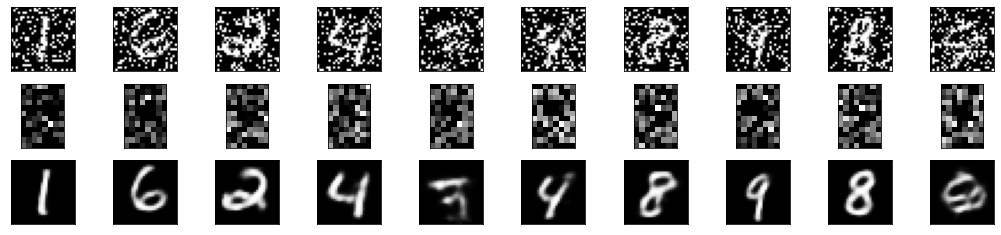

In [39]:
# Number of images to display
num_images = 10

# Random seed for selection
np.random.seed(42)

# Prepared images
x = flattened_x_test_seasoneed

# Random selection from images
random_test_images = np.random.randint(x.shape[0], size=num_images)

# Encode the images
encoded_imgs = encoder_only.predict(x)

# Encode AND Decode the images
decoded_imgs = autoencoder.predict(x)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(12, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


## Q4.B

Noise level: 0.0


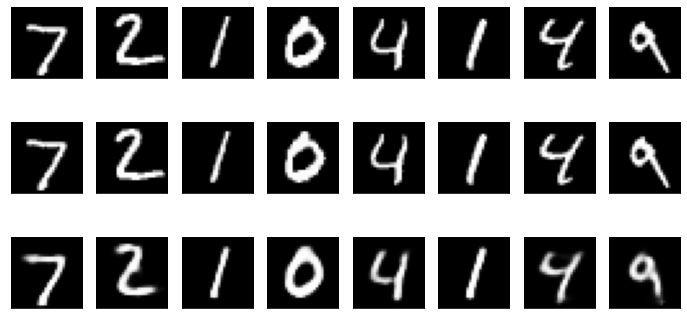

Noise level: 0.1


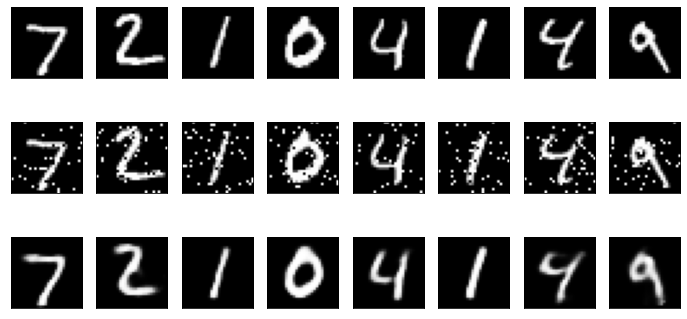

Noise level: 0.2


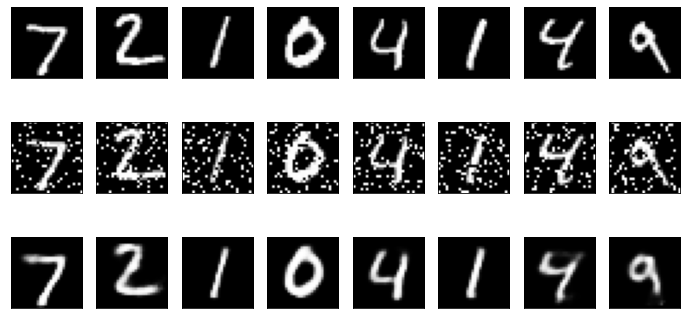

Noise level: 0.3


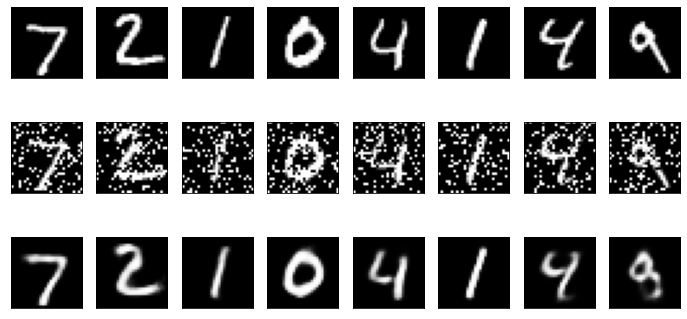

Noise level: 0.4


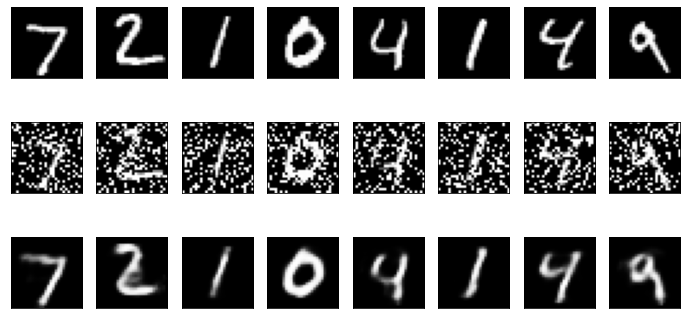

Noise level: 0.5


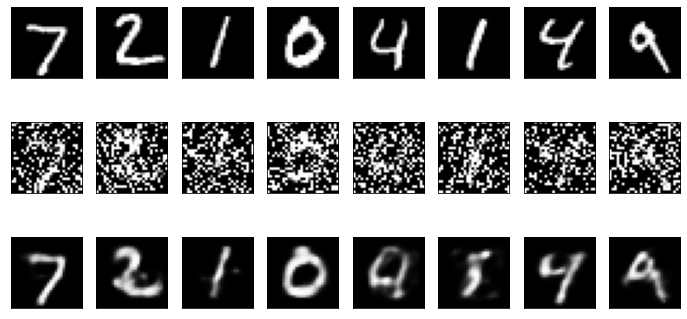

Noise level: 0.6


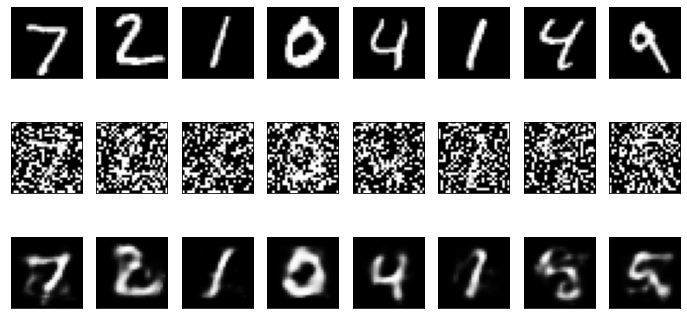

Noise level: 0.7


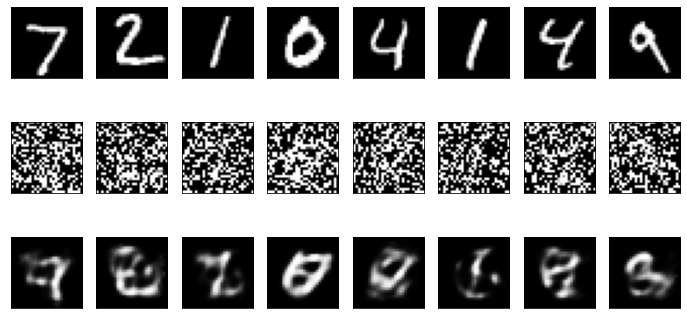

Noise level: 0.8


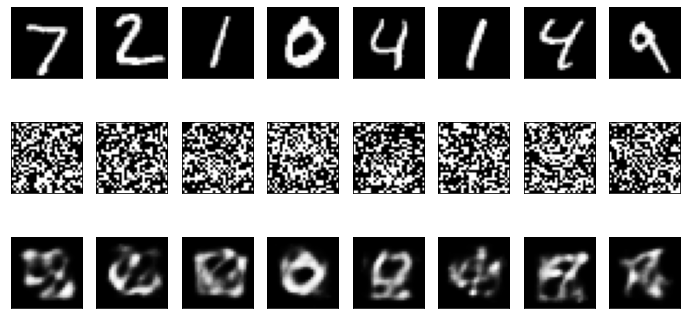

Noise level: 0.9


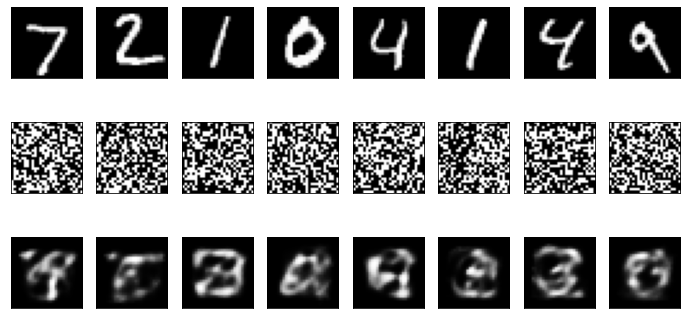

Noise level: 1.0


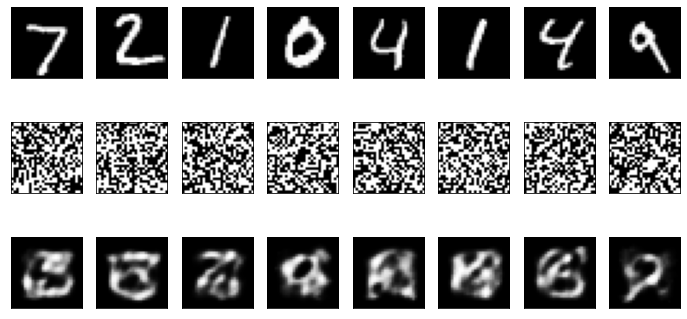

In [18]:
import random
noises = [ i / 10 for i in range(11) ]

for noise in noises:
    # Add noise to image
    flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise)

    # Remove noise using auto-encoder
    decoded_imgs = autoencoder.predict(flattened_x_test_seasoneed)

    plt.figure(figsize=(12, 6))
    print(f"Noise level: {noise}")

    # Number of images displayed
    imgCount = 8

    # Select random images
    pic_index = random.sample(range(1, len(flattened_x_test_seasoneed)), imgCount)
    for j in range(imgCount):
        index = pic_index[j]

        # plot original image
        ax = plt.subplot(3, imgCount, j + 1)
        plt.imshow(x_test[j].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # plot encoded image
        ax = plt.subplot(3, imgCount, j + 1 + imgCount)
        plt.imshow(flattened_x_test_seasoneed[j].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # plot reconstructed image
        ax = plt.subplot(3, imgCount, j + 1 + 2 * imgCount)
        plt.imshow(decoded_imgs[j].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()


The noise level limit when we stopped being able to identify the numbers accurately for us was around `0.4`, while for our model it is more around `0.6`, with some shapes (like the zero) going quite confidentily as high as `0.8`.


## Q4.C

313/313 [==============================] - 0s 1ms/step - loss: 3.7827 - accuracy: 0.3487


313/313 [==============================] - 0s 1ms/step - loss: 8.2286 - accuracy: 0.0972


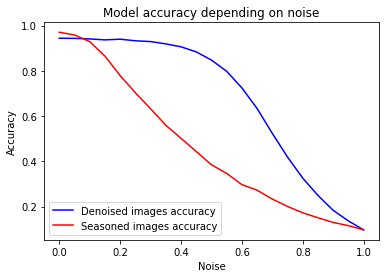

In [23]:
# 0, 0.05, 0.1 ...
noises = [ i / 20 for i in range(21) ]

# Accuracies from denoising the images first
scoresDenoised = []

# Accuracies without denoising
scoresSeasoned = []

for noise in noises:
    # Add noise
    flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise)

    # Remove noise using auto-encoder
    decoded_imgs = autoencoder.predict(flattened_x_test_seasoneed)

    # Reshape for model
    decoded_imgs_reshaped = decoded_imgs.reshape(len(decoded_imgs), 28, 28, 1)
    x_test_seasoned = flattened_x_test_seasoneed.reshape(len(flattened_x_test_seasoneed), 28, 28, 1)

    # Evaluate the model with auto-encoded images and save the result
    scoresDenoised.append(model.evaluate(decoded_imgs_reshaped, y_test)[1])
        
    # Evaluate the model with noisy images and save the result
    scoresSeasoned.append(model.evaluate(x_test_seasoned, y_test)[1])

# Plotting
plt.xlabel("Noise")
plt.ylabel("Accuracy")
plt.title("Model accuracy depending on noise")
plt.plot(noises, scoresDenoised, color="blue", label="Denoised images accuracy")
plt.plot(noises, scoresSeasoned, color="red", label="Seasoned images accuracy")
plt.legend()
plt.show()


If the images conatin little to no noise, the denoising the images actually led to a slightly lower accuracy. However, as soon as the images contain some degree of noise, denoising the image starts paying off. The denoised images accuracy is relatively high (with a slight decline as the noise increases) all the way to a noise level of  around `0.5`. After this point the denoised image accuracy declines rapidly as the noise level increases. It still surpasses the seasoned images accuracy though.

This indicates that an autoencoder can be very useful if the input data for a neural netowrk contains noise to varying degrees. However, if the data is of very high quality with little to no noise, the autoencoder has a detrimental effect and actually lowers the accuracy. This makes sense as the auto encoder will try to recreate the near to perfect data and mistakes or misinterpretations can happen in this process.

## Q4.D

One way of generating random images by using the decoder part of the autoencode is the following process:
* First isolate all the images of a certain number, in our case we picked the number `3`.
* Then, randomly pick `k` different images from this set, we picked `3`
* Compress each image.
* Take the combined average of the compressed representations.
* Then decode this resulting image from taking the average.

This will give you a new unique image of the number. The new image is blurrier as som of the information is lost when taking the average. Now we can repeat this process 10 times for a set of 10 different new images.

This process works since each compressed representation for the same number will have a common pattern with some small differences. Thus by averaging the images, we keep the common pattern intact while modifying the differences to create a slightly different representation. If we were to add noise to the compressed image like the way salt_and_pepper does, it would have too much of an effect on the common pattern.

If we pick a higher `k`, the resulting images get blurrier and all will be more similar to each other. This is because we are taking the average of all the compressed images, resulting in the details being lost as well as every result converging towards a common compressed image.

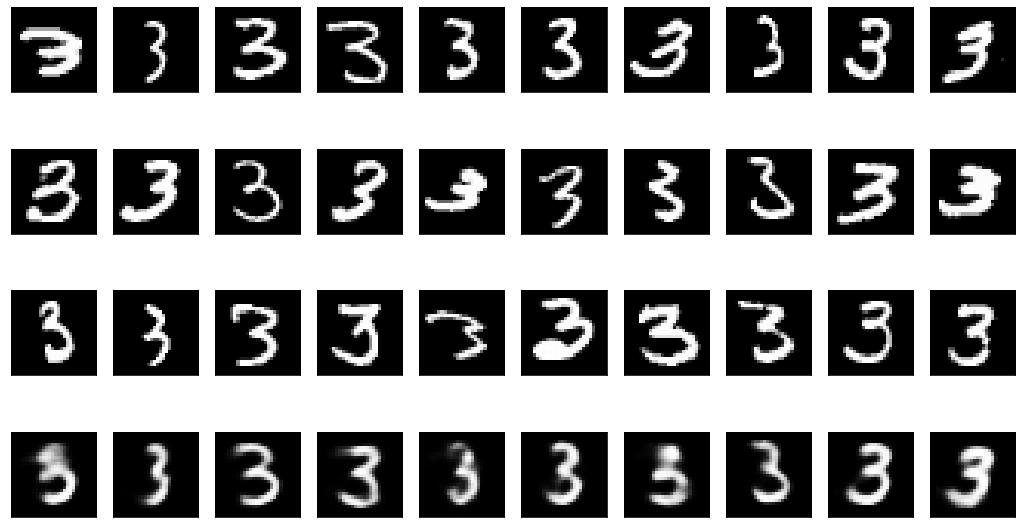

In [57]:
import random

num_images = 10
np.random.seed(42)

# Filter out all non "3" images
indices = [ i for i in range(len(y_test)) if y_test[i][3] == 1. ]
random.shuffle(indices)

imgs = [ flattened_x_test[i] for i in indices ]

random_test_images = []

k = 3

for n in range(num_images):    
    imgToMerge = random.choices(imgs, k=k)
    
    # Compressed images
    encoded = [ encoder_only.predict(img.reshape(-1,784)) for img in imgToMerge ]

    merged = np.zeros(encoded[0].shape)

    # Merge the encoded representations
    for encodedImg in encoded:
        merged += encodedImg * (1 / k)

    # Create a new image
    mergedImg = decoder_layer.predict(merged)
    random_test_images.append((imgToMerge, mergedImg))

plt.figure(figsize=(18, 10))

i = 0
for imgToMerge, merged in random_test_images:
    # plot original image n
    for n, img in enumerate(imgToMerge):
        ax = plt.subplot(k + 1, num_images, num_images * n + i + 1)
        plt.imshow(img.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    # plot merged image
    ax = plt.subplot(k + 1, num_images, k * num_images + i + 1)
    plt.imshow(merged.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    i += 1

plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ab83f1d1-4f39-4251-b899-1ad25d544179' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>